C:\Users\user\anaconda3\envs\data_env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


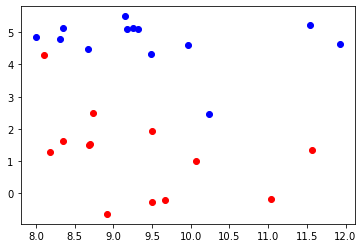

[[ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 9.49123469  4.33224792]
 [ 7.99815287  4.8525051 ]]


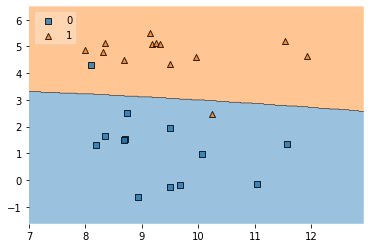

In [3]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import mglearn

# Data Loading
x_data, t_data = mglearn.datasets.make_forge()

# 데이터 분포도 확인
x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.show()

# model 생성
model = SVC()
model.fit(x_data, t_data)

# SVM은 support vector를 구하고 이를 이용해 Decision Boundaries를 구함
print(model.support_vectors_)

plot_decision_regions(X=x_data, y=t_data, clf=model, legend=2)
plt.show()

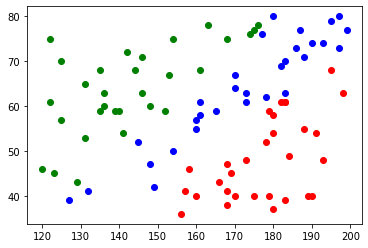

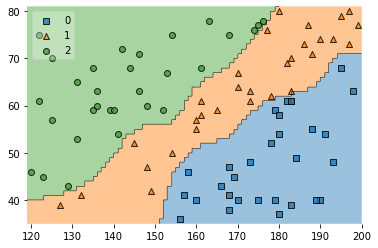

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height','weight']].values
t_data = df['label'].values

num = 30
x_data_red = x_data[t_data==0][:num]
t_data_red = t_data[t_data==0][:num]

x_data_blue = x_data[t_data==1][:num]
t_data_blue = t_data[t_data==1][:num]

x_data_green = x_data[t_data==2][:num]
t_data_green = t_data[t_data==2][:num]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0], x_data_green[:,1], color='g')
plt.show()

x_data_sample = np.concatenate((x_data_red, x_data_blue, x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red, t_data_blue, t_data_green), axis=0)

# skleanr 구현
model = SVC(C=100, gamma=0.01, kernel='rbf')
model.fit(x_data_sample, t_data_sample)
plot_decision_regions(X=x_data_sample, y=t_data_sample, 
                      clf=model, legend=2)
plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

# sklearn(SVC)
model = SVC()
model.fit(x_data_train_norm, t_data_train)

result = model.predict(x_data_test_norm)
print(classification_report(t_data_test,result))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1242
           1       0.98      0.98      0.98      1429
           2       0.96      0.98      0.97      1276
           3       0.98      0.96      0.97      1298
           4       0.97      0.97      0.97      1236
           5       0.97      0.98      0.97      1119
           6       0.98      0.98      0.98      1243
           7       0.98      0.96      0.97      1334
           8       0.97      0.97      0.97      1204
           9       0.96      0.96      0.96      1219

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



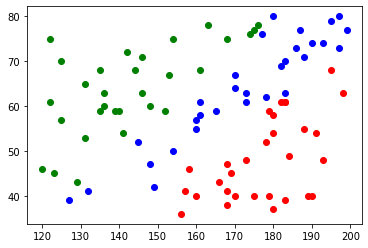

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=50, kernel=linear .............................................
[CV] .............................. C=50, kernel=linear, total=   0.0s
[CV] C=50, kernel=linear .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=1, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=5, kernel=rbf ........................................
[CV] ......................... C=1, gamma=5, kernel=rbf, total=   0.0s
[CV] C=1, gamma=5, kernel=rbf ........................................
[CV] .

[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=50, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=50, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=50, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=50, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .................... C=500, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=500, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=500, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=500, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=500, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .................. C=5000, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.005, kernel=rbf .................................
[CV] .................. C=5000, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.005, kernel=rbf .................................
[CV] .................. C=5000, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=5000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=5000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=5000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=5000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.6s finished


In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height','weight']].values
t_data = df['label'].values

num = 30
x_data_red = x_data[t_data==0][:num]
t_data_red = t_data[t_data==0][:num]

x_data_blue = x_data[t_data==1][:num]
t_data_blue = t_data[t_data==1][:num]

x_data_green = x_data[t_data==2][:num]
t_data_green = t_data[t_data==2][:num]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0], x_data_green[:,1], color='g')
plt.show()

x_data_sample = np.concatenate((x_data_red, x_data_blue, x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red, t_data_blue, t_data_green), axis=0)

# skleanr 구현
model = SVC()
parameter = [
    {'kernel' : ['linear'], 
     'C' : [10,50,100,500,1000,5000]},
    {'kernel' : ['rbf'], 
     'C' : [1,5,10,50,100,500,1000,5000], 
     'gamma' : [0.005,0.01,0.1,0.5,1,5,10,50]}
]
grid_search = GridSearchCV(model, parameter, 
                           cv=5, scoring='accuracy',
                           verbose=2)
grid_search.fit(x_data_sample, t_data_sample)
print(grid_search.best_params_)
print(grid_search.best_score_)

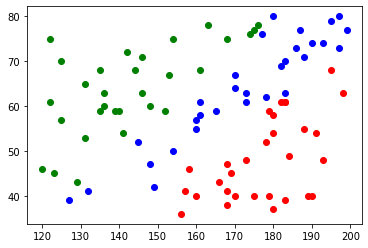

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf .......
[CV]  C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf, total=   0.0s
[CV] C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf .......
[CV]  C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf, total=   0.0s
[CV] C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf .......
[CV]  C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf, total=   0.0s
[CV] C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf .......
[CV]  C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf, total=   0.0s
[CV] C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf .......
[CV]  C=39.53385931561979, gamma=1.7537254377470717, kernel=rbf, total=   0.0s
[CV] C=3658.9665115044354, gamma=1.6207206236853822, kernel=linear ...
[CV]  C=3658.9665115044354, gamma=1.6207206236853822, kernel=linear, total=   0.0s
[CV] C=3658.9665115044354, gamma=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=18859.139700233576, gamma=0.043171783424716066, kernel=rbf ....
[CV]  C=18859.139700233576, gamma=0.043171783424716066, kernel=rbf, total=   0.0s
[CV] C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear ...
[CV]  C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear, total=   0.0s
[CV] C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear ...
[CV]  C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear, total=   0.0s
[CV] C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear ...
[CV]  C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear, total=   0.0s
[CV] C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear ...
[CV]  C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear, total=   0.0s
[CV] C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear ...
[CV]  C=3670.0596682074784, gamma=0.6368015515940231, kernel=linear, total=   0.0s
[CV] C=93.87897601196649, gamma=0.27983907723744567, kernel=linear ...
[CV]  

[CV]  C=31176.778026910804, gamma=0.18243599957243042, kernel=linear, total=   0.0s
[CV] C=31176.778026910804, gamma=0.18243599957243042, kernel=linear ..
[CV]  C=31176.778026910804, gamma=0.18243599957243042, kernel=linear, total=   0.0s
[CV] C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf .....
[CV]  C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf, total=   0.0s
[CV] C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf .....
[CV]  C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf, total=   0.0s
[CV] C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf .....
[CV]  C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf, total=   0.0s
[CV] C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf .....
[CV]  C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf, total=   0.0s
[CV] C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf .....
[CV]  C=32734.025494041434, gamma=0.16722959918910316, kernel=rbf, total=   0.0s
[

[CV] C=71881.10631241258, gamma=0.7954717965045348, kernel=linear ....
[CV]  C=71881.10631241258, gamma=0.7954717965045348, kernel=linear, total=   0.0s
[CV] C=71881.10631241258, gamma=0.7954717965045348, kernel=linear ....
[CV]  C=71881.10631241258, gamma=0.7954717965045348, kernel=linear, total=   0.0s
[CV] C=71881.10631241258, gamma=0.7954717965045348, kernel=linear ....
[CV]  C=71881.10631241258, gamma=0.7954717965045348, kernel=linear, total=   0.0s
[CV] C=71881.10631241258, gamma=0.7954717965045348, kernel=linear ....
[CV]  C=71881.10631241258, gamma=0.7954717965045348, kernel=linear, total=   0.0s
[CV] C=71881.10631241258, gamma=0.7954717965045348, kernel=linear ....
[CV]  C=71881.10631241258, gamma=0.7954717965045348, kernel=linear, total=   0.0s
[CV] C=385.0153909130669, gamma=0.21161443223124873, kernel=linear ...
[CV]  C=385.0153909130669, gamma=0.21161443223124873, kernel=linear, total=   0.0s
[CV] C=385.0153909130669, gamma=0.21161443223124873, kernel=linear ...
[CV]  C=38

[CV]  C=5365.862026124759, gamma=0.24200454751910896, kernel=linear, total=   0.0s
[CV] C=5365.862026124759, gamma=0.24200454751910896, kernel=linear ...
[CV]  C=5365.862026124759, gamma=0.24200454751910896, kernel=linear, total=   0.0s
[CV] C=74180.40725575815, gamma=3.0021513920873075, kernel=linear ....
[CV]  C=74180.40725575815, gamma=3.0021513920873075, kernel=linear, total=   0.0s
[CV] C=74180.40725575815, gamma=3.0021513920873075, kernel=linear ....
[CV]  C=74180.40725575815, gamma=3.0021513920873075, kernel=linear, total=   0.0s
[CV] C=74180.40725575815, gamma=3.0021513920873075, kernel=linear ....
[CV]  C=74180.40725575815, gamma=3.0021513920873075, kernel=linear, total=   0.0s
[CV] C=74180.40725575815, gamma=3.0021513920873075, kernel=linear ....
[CV]  C=74180.40725575815, gamma=3.0021513920873075, kernel=linear, total=   0.0s
[CV] C=74180.40725575815, gamma=3.0021513920873075, kernel=linear ....
[CV]  C=74180.40725575815, gamma=3.0021513920873075, kernel=linear, total=   0.0

[CV] C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf .......
[CV]  C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf, total=   0.0s
[CV] C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf .......
[CV]  C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf, total=   0.0s
[CV] C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf .......
[CV]  C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf, total=   0.0s
[CV] C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf .......
[CV]  C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf, total=   0.0s
[CV] C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf .......
[CV]  C=84.82510545088377, gamma=1.3172655371021866, kernel=rbf, total=   0.0s
[CV] C=32.35206846667643, gamma=1.6689826552175622, kernel=linear ....
[CV]  C=32.35206846667643, gamma=1.6689826552175622, kernel=linear, total=   0.0s
[CV] C=32.35206846667643, gamma=1.6689826552175622, kernel=linear ....
[CV]  C=32.35206846667643,

[CV] C=877.7669574029342, gamma=1.809795619671854, kernel=rbf ........
[CV]  C=877.7669574029342, gamma=1.809795619671854, kernel=rbf, total=   0.0s
[CV] C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear ...
[CV]  C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear, total=   0.0s
[CV] C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear ...
[CV]  C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear, total=   0.0s
[CV] C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear ...
[CV]  C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear, total=   0.0s
[CV] C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear ...
[CV]  C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear, total=   0.0s
[CV] C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear ...
[CV]  C=1009.5001013081823, gamma=1.1709619335040156, kernel=linear, total=   0.0s
[CV] C=5879.477189819191, gamma=0.0684463679111445, kernel=rbf .......
[CV]  C=58

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,reciprocal
df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height','weight']].values
t_data = df['label'].values

num = 30
x_data_red = x_data[t_data==0][:num]
t_data_red = t_data[t_data==0][:num]

x_data_blue = x_data[t_data==1][:num]
t_data_blue = t_data[t_data==1][:num]

x_data_green = x_data[t_data==2][:num]
t_data_green = t_data[t_data==2][:num]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0], x_data_green[:,1], color='g')
plt.show()

x_data_sample = np.concatenate((x_data_red, x_data_blue, x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red, t_data_blue, t_data_green), axis=0)

# skleanr 구현
model = SVC()
parameter = [
    {'kernel' : ['linear','rbf'], 
     'C' : reciprocal(20,200000),
     'gamma' : expon(scale=1.0)}
]

random_search = RandomizedSearchCV(model, parameter,
                                    cv=5, n_iter=100,
                                    scoring='accuracy', verbose=2)

random_search.fit(x_data_sample, t_data_sample)
print(grid_search.best_params_)
print(grid_search.best_score_)